# Draft Test Results

Notebook for presenting the results from running the test results from our successful draft run.



Extra notes:
* See the code repo README for some of the pre-requisites for running the notebook.

In [12]:
from ray.tune.analysis.experiment_analysis import ExperimentAnalysis

ea = ExperimentAnalysis(experiment_checkpoint_path="final_results_2023-05-01/experiment_state-2023-04-30_16-58-55.json")

ea.results_df

,ACC,lr,val_loss,train_acc,train_loss,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,...,config/args,config/lr,config/batch_size,config/currerent_fold,config/data_percentage,config/training_size,config/partition_random_state,config/layer_model,config/layer_index,config/model_name
trial_id,,,,,,,,,,,,,,,,,,,,,
f6f12_00000,70.776009,0.097967,14.672433,50.267380,0.697799,523.510308,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.097967,16,0,0.001823,400,2,"[3, TCL]",3,TCL
f6f12_00001,78.097809,0.000356,0.491279,79.952271,0.443200,597.783554,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.000356,8,3,0.001823,400,0,"[4, TCL]",4,TCL
f6f12_00002,77.221298,0.005379,0.474169,78.042961,0.595853,418.145377,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.005379,16,3,0.001823,400,0,"[5, TCL]",5,TCL
f6f12_00003,75.353874,0.000119,0.518713,84.343437,0.371527,491.867697,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.000119,32,2,0.001823,400,0,"[6, TCL]",6,TCL
f6f12_00004,83.241974,0.000092,0.399364,86.873154,0.317819,380.795346,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.000092,32,4,0.002735,600,1,"[3, TCL]",3,TCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f6f12_00115,73.458206,0.000011,0.569176,80.127190,0.456767,430.599046,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.000011,64,3,0.002735,600,0,"[6, TCL]",6,TCL
f6f12_00116,79.358795,0.000027,0.440586,82.510017,0.393047,522.605784,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.000027,32,0,0.003647,800,1,"[3, TCL]",3,TCL
f6f12_00117,73.741646,0.033282,0.833333,57.161629,0.675679,523.041853,True,True,None,None,...,"Namespace(smoke_test=False, root_dir='/cascade...",0.033282,32,1,0.003647,800,0,"[4, TCL]",4,TCL


In [1]:
import os
import pandas as pd
import numpy as np
import torch

import sys
sys.path.append('../')
sys.path.append('../model/sourcemodel')
import pickle


from util import AverageMeter, accuracy
from data_manager.IDC import get_dataloader


def load_data(dir):
    with open(dir, 'rb') as f:
        data = pickle.load(f)
    f.close()
    return data


def load_idc(random_state=0):
    root = './Breast_Histopathology_Images'
    path = root + '/' + 'Breast_histopathplogy_data.csv'
    bs = 32
    cur = 1
    ss = 1.0
    n_wok = 3
    n_split = 5

    dataloader = get_dataloader(root, path, bs, ss, cur, n_wok, n_split,
                                         random_state=random_state)
    train_loader, val_loader, test_loader = dataloader.get_data_loader()

    return train_loader, val_loader, test_loader


_partition_random_state = [0,1,2]
T_SIZE = 219388
data_fractions = [400/T_SIZE, 600/T_SIZE, 800/T_SIZE]
#data_fractions = [4/T_SIZE, 6/T_SIZE, 8/T_SIZE]

In [2]:
# Loading Original Paper's results
df = pd.read_csv('./result.csv')
df

,Unnamed: 0,ACC,trial_id,Learning Method,Training Size,partition_random_state,currerent_fold,data_percentage
0,0,81.242989,c26a5_00004,TCL (Conv),800,0,1,0.003647
1,1,83.187889,c26a5_00004,TCL (Conv),800,0,1,0.003647
2,2,83.949829,c26a5_00004,TCL (Conv),800,0,1,0.003647
3,3,82.303581,c26a5_00004,TCL (Conv),800,0,1,0.003647
4,4,83.681763,c26a5_00004,TCL (Conv),800,0,1,0.003647
...,...,...,...,...,...,...,...,...
1245,1245,84.453239,c26a5_00296,TCL (Conv),600,0,4,0.002735
1246,1246,82.704018,c26a5_00296,TCL (Conv),600,0,4,0.002735
1247,1247,80.626602,c26a5_00296,TCL (Conv),600,0,4,0.002735
1248,1248,80.721336,c26a5_00296,TCL (Conv),600,0,4,0.002735


In [3]:
draft_results = pd.read_csv('./final_results_2023-05-01.csv').filter(items=['Unnamed: 0', 'ACC', 'trial_id', 'Learning Method', 'Training Size', 'partition_random_state', 'currerent_fold', 'data_percentage'])
draft_results

,Unnamed: 0,ACC,trial_id,Learning Method,partition_random_state,currerent_fold,data_percentage
0,1454,70.776009,f6f12_00000,TCL DLH,2,0,0.001823
1,1455,78.097809,f6f12_00001,TCL DLH,0,3,0.001823
2,1456,77.221298,f6f12_00002,TCL DLH,0,3,0.001823
3,1457,75.353874,f6f12_00003,TCL DLH,0,2,0.001823
4,1458,83.241974,f6f12_00004,TCL DLH,1,4,0.002735
...,...,...,...,...,...,...,...
115,1569,73.458206,f6f12_00115,TCL DLH,0,3,0.002735
116,1570,79.358795,f6f12_00116,TCL DLH,1,0,0.003647
117,1571,73.741646,f6f12_00117,TCL DLH,0,1,0.003647
118,1572,79.780754,f6f12_00118,TCL DLH,1,4,0.003647


In [4]:
df = pd.concat([df, draft_results])

In [5]:
result_id_aux = []

for cfold in range(5):
    for lm in ['TE2E (Conv)', 'TCL (Conv)', 'TCL DLH']:
        for d in df.data_percentage.unique(): # datapercentage
            try:
                r = df.loc[(df['currerent_fold'] == cfold)
                                    &(df['Learning Method'] == lm)
                           &(df['data_percentage'] == d)]
                result_id_aux.append(r['ACC'].idxmax())
            except Exception as e: 
                continue


aux = df.loc[result_id_aux].copy()

max_result = aux
max_result['Training Size'] = max_result['data_percentage'].apply(lambda x: int(T_SIZE * x))
max_result['Classifier'] = 'Aux'
max_result = max_result.replace('Aux', 'Auxiliary')

max_ = max_result.groupby(['Classifier','data_percentage'
                           , 'partition_random_state', 'Learning Method']).max()
max_

Unnamed: 0  \
Classifier data_percentage partition_random_state Learning Method               
Auxiliary  0.001823        0                      TCL DLH                1478   
                           1                      TCL DLH                1562   
                           2                      TCL DLH                1538   
                           0                      TCL (Conv)             1025   
                                                  TE2E (Conv)             515   
                           1                      TCL (Conv)              238   
                                                  TE2E (Conv)             737   
                           2                      TE2E (Conv)             306   
           0.002735        0                      TCL DLH                1566   
                           1                      TCL DLH                1533   
                           0                      TCL (Conv)             1114   
                                                  TE2E (Conv)             268   
                           1                      TCL (Conv)              540   
                                                  TE2E (Conv)            1003   
                           2                      TE2E (Conv)            1072   
           0.003647        0                      TCL (Conv)              119   
                                                  TE2E (Conv)             587   
                           1                      TCL (Conv)              796   
                                                  TE2E (Conv)             965   
                           2                      TE2E (Conv)             452   
                           0                      TCL DLH                1558   
                           2                      TCL DLH                1573   

                                                                         ACC  \
Classifier data_percentage partition_random_state Learning Method              
Auxiliary  0.001823        0                      TCL DLH          82.318855   
                           1                      TCL DLH          81.756660   
                           2                      TCL DLH          82.249680   
                           0                      TCL (Conv)       85.948631   
                                                  TE2E (Conv)      83.613914   
                           1                      TCL (Conv)       84.513420   
                                                  TE2E (Conv)      85.783867   
                           2                      TE2E (Conv)      86.184517   
           0.002735        0                      TCL DLH          83.867905   
                           1                      TCL DLH          82.031563   
                           0                      TCL (Conv)       85.833664   
                                                  TE2E (Conv)      85.277023   
                           1                      TCL (Conv)       86.035881   
                                                  TE2E (Conv)      86.654587   
                           2                      TE2E (Conv)      86.390450   
           0.003647        0                      TCL (Conv)       86.413368   
                                                  TE2E (Conv)      85.410744   
                           1                      TCL (Conv)       86.699615   
                                                  TE2E (Conv)      83.567688   
                           2                      TE2E (Conv)      86.191109   
                           0                      TCL DLH          84.473564   
                           2                      TCL DLH          86.457077   

                                                                      trial_id  \
Classifier data_percentage partition_random_state Learning Method                
Auxiliary  0.001823        0         

In [6]:
max_.trial_id

Classifier  data_percentage  partition_random_state  Learning Method
Auxiliary   0.001823         0                       TCL DLH            f6f12_00024
                             1                       TCL DLH            f6f12_00108
                             2                       TCL DLH            f6f12_00084
                             0                       TCL (Conv)         c26a5_00144
                                                     TE2E (Conv)        c26a5_00295
                             1                       TCL (Conv)         c26a5_00240
                                                     TE2E (Conv)        c26a5_00067
                             2                       TE2E (Conv)        c26a5_00223
            0.002735         0                       TCL DLH            f6f12_00112
                             1                       TCL DLH            f6f12_00079
                             0                       TCL (Conv)         c26a5_00296
       

In [7]:
# getting test result
from sklearn.metrics import confusion_matrix

paths = ['./TCL_IDC', './final_results_2023-05-01']
def get_model_score(trial_id):
    output, logit, score = 0, 0, 0
    for path in paths:
        for i in os.listdir(path):
            if trial_id in i:
                ckpt = os.path.join(path, i, 'checkpoint')
                output = torch.load(ckpt, map_location='cpu')['model_state_dict']
                logit = torch.load(ckpt, map_location='cpu')['predict_logit']
                score = torch.load(ckpt, map_location='cpu')['score']
                return output, logit, score

    return output, logit, score

def get_test_acc_logit(df, trial_id):
    trial_config = df.loc[df.trial_id == trial_id].iloc[0]
    
    _, logit, score = get_model_score(trial_id)
    return {'logit':logit, 'ACC':score}


In [8]:
# compute combined classifier performance

acc_combined = []
classifier = []
data_fraction = []
test_partition = []

for i in ['Auxiliary']:
    for j in df.data_percentage.unique():
        for p in df.partition_random_state.unique(): # random state of test partition
            try:
                trials = max_.loc[(i,j,p)]
                assert len(trials) == 2 # need TCL and TE2E to combine
            except:
                continue
                
            # load testing set
            test_loader = load_idc(random_state=p)[2]
            label_test = test_loader.dataset.df_data.target.to_numpy()

            trial_id = list(trials.trial_id)
            trial_1 = get_test_acc_logit(df, trial_id[0])
            trial_2 = get_test_acc_logit(df, trial_id[1])

            # result for trial 1
            logit_trial_1 = trial_1['logit']
            #print(f'logit_trial_1: {logit_trial_1}')

            # result for trial 2
            logit_trial_2 = trial_2['logit']
            #print(f'logit_trial_2: {logit_trial_2}')

            # combined activations
            combined = (logit_trial_1 + logit_trial_2) / 2
            #print(f'combined: {combined}')

            # calculate acc
            acc = 100* np.sum(np.argmax(combined, axis=1) == label_test)/len(label_test)

            # combined classfiers
            acc_combined.append(acc)
            classifier.append(i)
            data_fraction.append(j)
            test_partition = [p]
        
df_combined = pd.DataFrame({'Classifier':classifier
                            , 'data_percentage':data_fraction
                            , 'Testing_ACC':acc_combined,
                           'Testing Partition':p})
df_combined['Training Size'] = df_combined['data_percentage'].apply(lambda x: int(T_SIZE * x))
df_combined['Learning Method'] = 'Combined'
df_combined

5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  224   |   test -  55
5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  224   |   test -  55
5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  224   |   test -  55
5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  224   |   test -  55
5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  223   |   test -  56
train -  224   |   test -  55
5 cross validation, patiens nums
train -  223   |   test -  56
train -  223   |   tes

,Classifier,data_percentage,Testing_ACC,Testing Partition,Training Size,Learning Method
0,Auxiliary,0.003647,85.675164,2,799,Combined
1,Auxiliary,0.003647,85.765246,2,799,Combined
2,Auxiliary,0.001823,84.055490,2,399,Combined
3,Auxiliary,0.001823,85.386902,2,399,Combined
4,Auxiliary,0.002735,85.042789,2,599,Combined
5,Auxiliary,0.002735,85.844519,2,599,Combined


In [9]:
acc = []
classifier = []
data_fraction = []
learning_method = []
test_partition = []

for i in ['Auxiliary']:
    for j in df.data_percentage.unique():
        for p in df.partition_random_state.unique(): # random state of test partition
            for l in ['TCL (Conv)', 'TE2E (Conv)', 'TCL DLH']:
                try:
                    trials = max_.loc[(i,j,p,l)] # fetch trials from max_
                except:
                    continue
                if l in ['TCL (Conv)', 'TE2E (Conv)']:
                    trial_acc = get_test_acc_logit(df, trials.trial_id)['ACC']
                else:
                    trial_acc = df.loc[df.trial_id == trials.trial_id]['ACC'].iloc[0]
                    print(f'trial_acc: {trial_acc}')

                # combined classfiers
                acc.append(trial_acc)
                classifier.append(i)
                data_fraction.append(j)
                learning_method.append(l)
                test_partition.append(p)
        
df_new = pd.DataFrame({'Classifier':classifier
                            , 'data_percentage':data_fraction
                            , 'Testing_ACC':acc,
                      'Learning Method':learning_method, 
                      'Testing Partition':test_partition})

df_new['Training Size'] = df_new['data_percentage'].apply(lambda x: int(T_SIZE * x))
df_new

trial_acc: 82.3188552856445
trial_acc: 81.7566604614258
trial_acc: 82.2496795654297
trial_acc: 83.8679046630859
trial_acc: 82.0315628051758
trial_acc: 84.4735641479492
trial_acc: 79.4616317749023


,Classifier,data_percentage,Testing_ACC,Learning Method,Testing Partition,Training Size
0,Auxiliary,0.003647,84.550941,TCL (Conv),0,799
1,Auxiliary,0.003647,83.949196,TE2E (Conv),0,799
2,Auxiliary,0.003647,85.511215,TCL (Conv),1,799
3,Auxiliary,0.003647,82.853798,TE2E (Conv),1,799
4,Auxiliary,0.003647,83.469955,TE2E (Conv),2,799
5,Auxiliary,0.001823,83.606880,TCL (Conv),0,399
6,Auxiliary,0.001823,83.178093,TE2E (Conv),0,399
7,Auxiliary,0.001823,84.922081,TCL (Conv),1,399
8,Auxiliary,0.001823,83.871727,TE2E (Conv),1,399
9,Auxiliary,0.001823,83.925774,TE2E (Conv),2,399


In [10]:
max_combined = df_new.merge(df_combined, on=list(df_combined), how='outer')
max_combined = max_combined.rename(columns={'Testing_ACC': 'Testing ACC'})
max_combined

,Classifier,data_percentage,Testing ACC,Learning Method,Testing Partition,Training Size
0,Auxiliary,0.003647,84.550941,TCL (Conv),0,799
1,Auxiliary,0.003647,83.949196,TE2E (Conv),0,799
2,Auxiliary,0.003647,85.511215,TCL (Conv),1,799
3,Auxiliary,0.003647,82.853798,TE2E (Conv),1,799
4,Auxiliary,0.003647,83.469955,TE2E (Conv),2,799
5,Auxiliary,0.001823,83.606880,TCL (Conv),0,399
6,Auxiliary,0.001823,83.178093,TE2E (Conv),0,399
7,Auxiliary,0.001823,84.922081,TCL (Conv),1,399
8,Auxiliary,0.001823,83.871727,TE2E (Conv),1,399
9,Auxiliary,0.001823,83.925774,TE2E (Conv),2,399


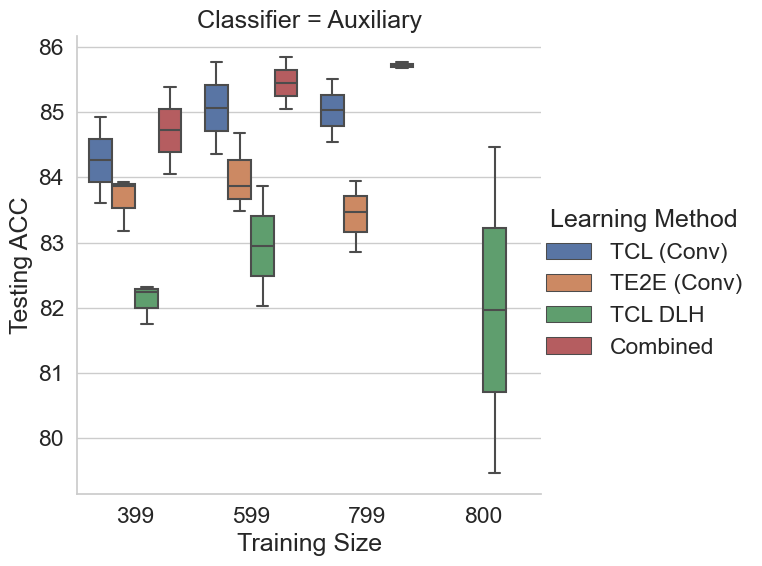

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.5)
sns.color_palette("hls")

sns.catplot(data=max_combined, x='Training Size', y='Testing ACC'
            , hue='Learning Method',col='Classifier', kind='box',
           height=6, aspect=1.0,)